In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#圖表中文化
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] 
plt.rcParams['axes.unicode_minus'] = False

# 我們取 鐵達尼號的 結構化 的 數據集 來做 KMeans 分類

## 先載入資料

In [3]:
df=pd.read_csv('http://bit.ly/kaggletrain')

## 取 存活者 資料來分析

In [4]:
df1 = df[df.Survived==1]

In [5]:
df1 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
df1.values

array([[2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       [4, 1, 1, ..., 53.1, 'C123', 'S'],
       ...,
       [881, 1, 2, ..., 26.0, nan, 'S'],
       [888, 1, 1, ..., 30.0, 'B42', 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C']], dtype=object)

## 把 Dataframe 轉成 Array

In [210]:
X=np.array(df1)

In [211]:
X

array([[2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       [4, 1, 1, ..., 53.1, 'C123', 'S'],
       ...,
       [881, 1, 2, ..., 26.0, nan, 'S'],
       [888, 1, 1, ..., 30.0, 'B42', 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C']], dtype=object)

## 只取 Sex, Age, Fare 當成 要送 KMeans 分類的資料

In [212]:
X=X[:,[4,5,9]]

In [213]:
X

array([['female', 38.0, 71.2833],
       ['female', 26.0, 7.925],
       ['female', 35.0, 53.1],
       ...,
       ['female', 25.0, 26.0],
       ['female', 19.0, 30.0],
       ['male', 26.0, 30.0]], dtype=object)

# 因為直接送會產生錯誤，所以，要先將資料做整理，轉成數值。

In [214]:
X[X=='female']=0
X[X=='male']=1

In [215]:
X

array([[0, 38.0, 71.2833],
       [0, 26.0, 7.925],
       [0, 35.0, 53.1],
       ...,
       [0, 25.0, 26.0],
       [0, 19.0, 30.0],
       [1, 26.0, 30.0]], dtype=object)

# 資料準備好，開始使用 KMeans

In [216]:
from sklearn.cluster import KMeans

## 因為年齡１～１００歲，大致可分10個級距，所以，我們只是玩玩看

In [229]:
clf=KMeans(n_clusters=10)

## 在執行過程中，因為產生了一些資料上的錯誤，無法解決，所以 [ChatGPT](https://openai.com/blog/chatgpt/) 給了以下解決方法

In [230]:
from sklearn.impute import SimpleImputer

# 創建 SimpleImputer 物件，並設定使用中位數替換 NaN 值
imputer = SimpleImputer(strategy='median')

# 使用 imputer 物件對資料進行轉換，將 NaN 值替換為中位數
X = imputer.fit_transform(X)

## 真的太神啦，fit 沒出錯了～

In [231]:
clf.fit(X)

KMeans(n_clusters=10)

## 分類後的結果

In [232]:
clf.labels_

array([4, 0, 8, 0, 5, 5, 7, 7, 0, 0, 0, 0, 6, 6, 0, 9, 0, 0, 0, 5, 0, 0,
       4, 6, 6, 0, 5, 4, 0, 0, 0, 8, 5, 0, 0, 0, 0, 0, 1, 8, 6, 0, 0, 6,
       0, 0, 0, 6, 6, 6, 0, 0, 0, 8, 0, 7, 5, 8, 5, 5, 5, 0, 7, 0, 0, 5,
       7, 9, 0, 0, 0, 0, 6, 6, 2, 0, 4, 0, 4, 0, 4, 5, 5, 0, 0, 8, 0, 4,
       4, 3, 7, 5, 0, 9, 9, 0, 7, 0, 4, 6, 0, 0, 7, 0, 4, 4, 6, 1, 0, 6,
       0, 9, 2, 2, 8, 4, 1, 0, 6, 9, 9, 0, 6, 9, 0, 6, 8, 6, 9, 9, 7, 5,
       1, 0, 7, 0, 5, 8, 0, 0, 4, 0, 0, 8, 8, 4, 0, 1, 5, 8, 0, 0, 2, 0,
       2, 0, 0, 0, 5, 4, 7, 6, 0, 6, 6, 0, 6, 0, 7, 2, 0, 7, 0, 0, 4, 5,
       6, 5, 7, 4, 0, 8, 7, 7, 5, 6, 0, 5, 7, 4, 4, 5, 4, 4, 6, 6, 8, 0,
       6, 8, 0, 6, 4, 8, 7, 5, 6, 5, 2, 8, 4, 6, 6, 0, 5, 2, 0, 0, 7, 4,
       6, 0, 7, 8, 6, 0, 0, 8, 0, 6, 2, 4, 4, 4, 6, 8, 6, 6, 6, 6, 9, 0,
       8, 5, 8, 0, 4, 7, 6, 0, 8, 8, 5, 4, 7, 0, 6, 0, 9, 0, 8, 6, 0, 0,
       3, 4, 1, 8, 5, 8, 0, 1, 6, 7, 7, 9, 0, 8, 8, 1, 0, 5, 8, 6, 0, 1,
       3, 6, 1, 0, 0, 5, 5, 8, 5, 4, 0, 2, 4, 7, 5,

## 年齡跟票價的分類示意圖.... 得到了什麼啟發嗎？可試試: 如果把上面的 n_clusters=10 改成3

Text(0.5, 1.0, 'K-means Clustering')

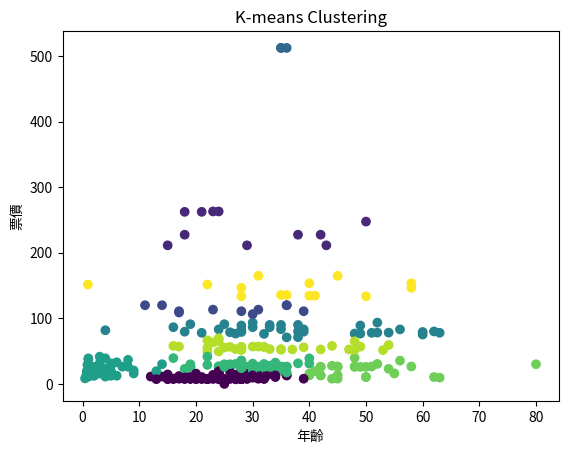

In [233]:
plt.scatter(X[:,1],X[:,2],c=clf.labels_)
plt.xlabel('年齡')
plt.ylabel('票價')
plt.title('K-means Clustering')

## 結論：也許拿Cabin跟票價比較有分析價值?!